# Linear Regression from Scratch

## Introduction

Linear regression is one of the most fundamental algorithms in statistical learning and machine learning. It models the relationship between a dependent variable $y$ and one or more independent variables $\mathbf{x}$ by fitting a linear equation to observed data.

## Mathematical Foundation

### Simple Linear Regression

For a single predictor variable, the linear regression model is:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where:
- $y$ is the dependent variable (response)
- $x$ is the independent variable (predictor)
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope coefficient
- $\epsilon$ is the error term (noise)

### Multiple Linear Regression

For multiple predictors, we extend to matrix notation:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

where:
- $\mathbf{y} \in \mathbb{R}^n$ is the response vector
- $\mathbf{X} \in \mathbb{R}^{n \times (p+1)}$ is the design matrix (with column of ones for intercept)
- $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$ is the coefficient vector
- $\boldsymbol{\epsilon} \in \mathbb{R}^n$ is the error vector

## Ordinary Least Squares (OLS) Estimation

The goal is to find $\hat{\boldsymbol{\beta}}$ that minimizes the sum of squared residuals:

$$\hat{\boldsymbol{\beta}} = \underset{\boldsymbol{\beta}}{\arg\min} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2$$

### Cost Function

The cost function (Mean Squared Error) is:

$$J(\boldsymbol{\beta}) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n}(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

### Normal Equation

Taking the derivative and setting it to zero:

$$\frac{\partial J}{\partial \boldsymbol{\beta}} = -\frac{2}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0$$

Solving for $\boldsymbol{\beta}$:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

This is the **closed-form solution** for linear regression.

### Gradient Descent Alternative

For large datasets, we can use gradient descent:

$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \alpha \nabla J(\boldsymbol{\beta}^{(t)})$$

where $\alpha$ is the learning rate and:

$$\nabla J(\boldsymbol{\beta}) = -\frac{2}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Implementation from Scratch

We will implement a `LinearRegression` class that supports both the closed-form solution (Normal Equation) and gradient descent optimization.

In [2]:
class LinearRegression:
    """
    Linear Regression implementation from scratch.
    
    Supports both closed-form (Normal Equation) and gradient descent solutions.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='closed_form'):
        """
        Initialize the Linear Regression model.
        
        Parameters:
        -----------
        learning_rate : float
            Learning rate for gradient descent
        n_iterations : int
            Number of iterations for gradient descent
        method : str
            'closed_form' or 'gradient_descent'
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def _add_intercept(self, X):
        """Add a column of ones for the intercept term."""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def _compute_cost(self, X, y, theta):
        """Compute the Mean Squared Error cost function."""
        n = len(y)
        predictions = X @ theta
        cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
        return cost
    
    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Training features of shape (n_samples, n_features)
        y : numpy.ndarray
            Target values of shape (n_samples,)
        """
        # Ensure y is a column vector
        y = y.reshape(-1, 1)
        
        # Add intercept column
        X_b = self._add_intercept(X)
        n_samples, n_features = X_b.shape
        
        if self.method == 'closed_form':
            # Normal Equation: theta = (X^T X)^(-1) X^T y
            theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        
        elif self.method == 'gradient_descent':
            # Initialize weights randomly
            theta = np.random.randn(n_features, 1) * 0.01
            
            # Gradient descent
            for i in range(self.n_iterations):
                # Compute predictions
                predictions = X_b @ theta
                
                # Compute gradients
                gradients = (1 / n_samples) * X_b.T @ (predictions - y)
                
                # Update weights
                theta = theta - self.learning_rate * gradients
                
                # Store cost for visualization
                cost = self._compute_cost(X_b, y, theta)
                self.cost_history.append(cost)
        
        else:
            raise ValueError("Method must be 'closed_form' or 'gradient_descent'")
        
        # Extract bias and weights
        self.bias = theta[0, 0]
        self.weights = theta[1:].flatten()
        
        return self
    
    def predict(self, X):
        """
        Predict target values for input features.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Input features of shape (n_samples, n_features)
        
        Returns:
        --------
        numpy.ndarray
            Predicted values
        """
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        """
        Compute the R² score (coefficient of determination).
        
        R² = 1 - SS_res / SS_tot
        
        Parameters:
        -----------
        X : numpy.ndarray
            Input features
        y : numpy.ndarray
            True target values
        
        Returns:
        --------
        float
            R² score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

## Generate Synthetic Data

We create a dataset with a known linear relationship plus Gaussian noise:

$$y = 3 + 2x_1 + 1.5x_2 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 1)$$

In [3]:
# Generate synthetic data
n_samples = 200
n_features = 2

# True parameters
true_intercept = 3.0
true_weights = np.array([2.0, 1.5])

# Generate features
X = np.random.randn(n_samples, n_features)

# Generate target with noise
noise = np.random.randn(n_samples) * 1.0
y = true_intercept + X @ true_weights + noise

print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"True intercept: {true_intercept}")
print(f"True weights: {true_weights}")

Dataset shape: X=(200, 2), y=(200,)
True intercept: 3.0
True weights: [2.  1.5]


## Train Models

We will train two models: one using the closed-form solution and one using gradient descent, then compare their results.

In [4]:
# Train with closed-form solution
model_closed = LinearRegression(method='closed_form')
model_closed.fit(X, y)

print("=== Closed-Form Solution ===")
print(f"Estimated intercept: {model_closed.bias:.4f}")
print(f"Estimated weights: {model_closed.weights}")
print(f"R² score: {model_closed.score(X, y):.4f}")
print()

=== Closed-Form Solution ===
Estimated intercept: 2.9121
Estimated weights: [2.06614468 1.54683588]
R² score: 0.8589



In [5]:
# Train with gradient descent
model_gd = LinearRegression(
    method='gradient_descent',
    learning_rate=0.1,
    n_iterations=1000
)
model_gd.fit(X, y)

print("=== Gradient Descent Solution ===")
print(f"Estimated intercept: {model_gd.bias:.4f}")
print(f"Estimated weights: {model_gd.weights}")
print(f"R² score: {model_gd.score(X, y):.4f}")

=== Gradient Descent Solution ===
Estimated intercept: 2.9121
Estimated weights: [2.06614468 1.54683588]
R² score: 0.8589


## Visualization

We will create a comprehensive visualization showing:
1. The data and regression fit (for 1D projection)
2. Gradient descent convergence
3. Residual analysis
4. Parameter comparison

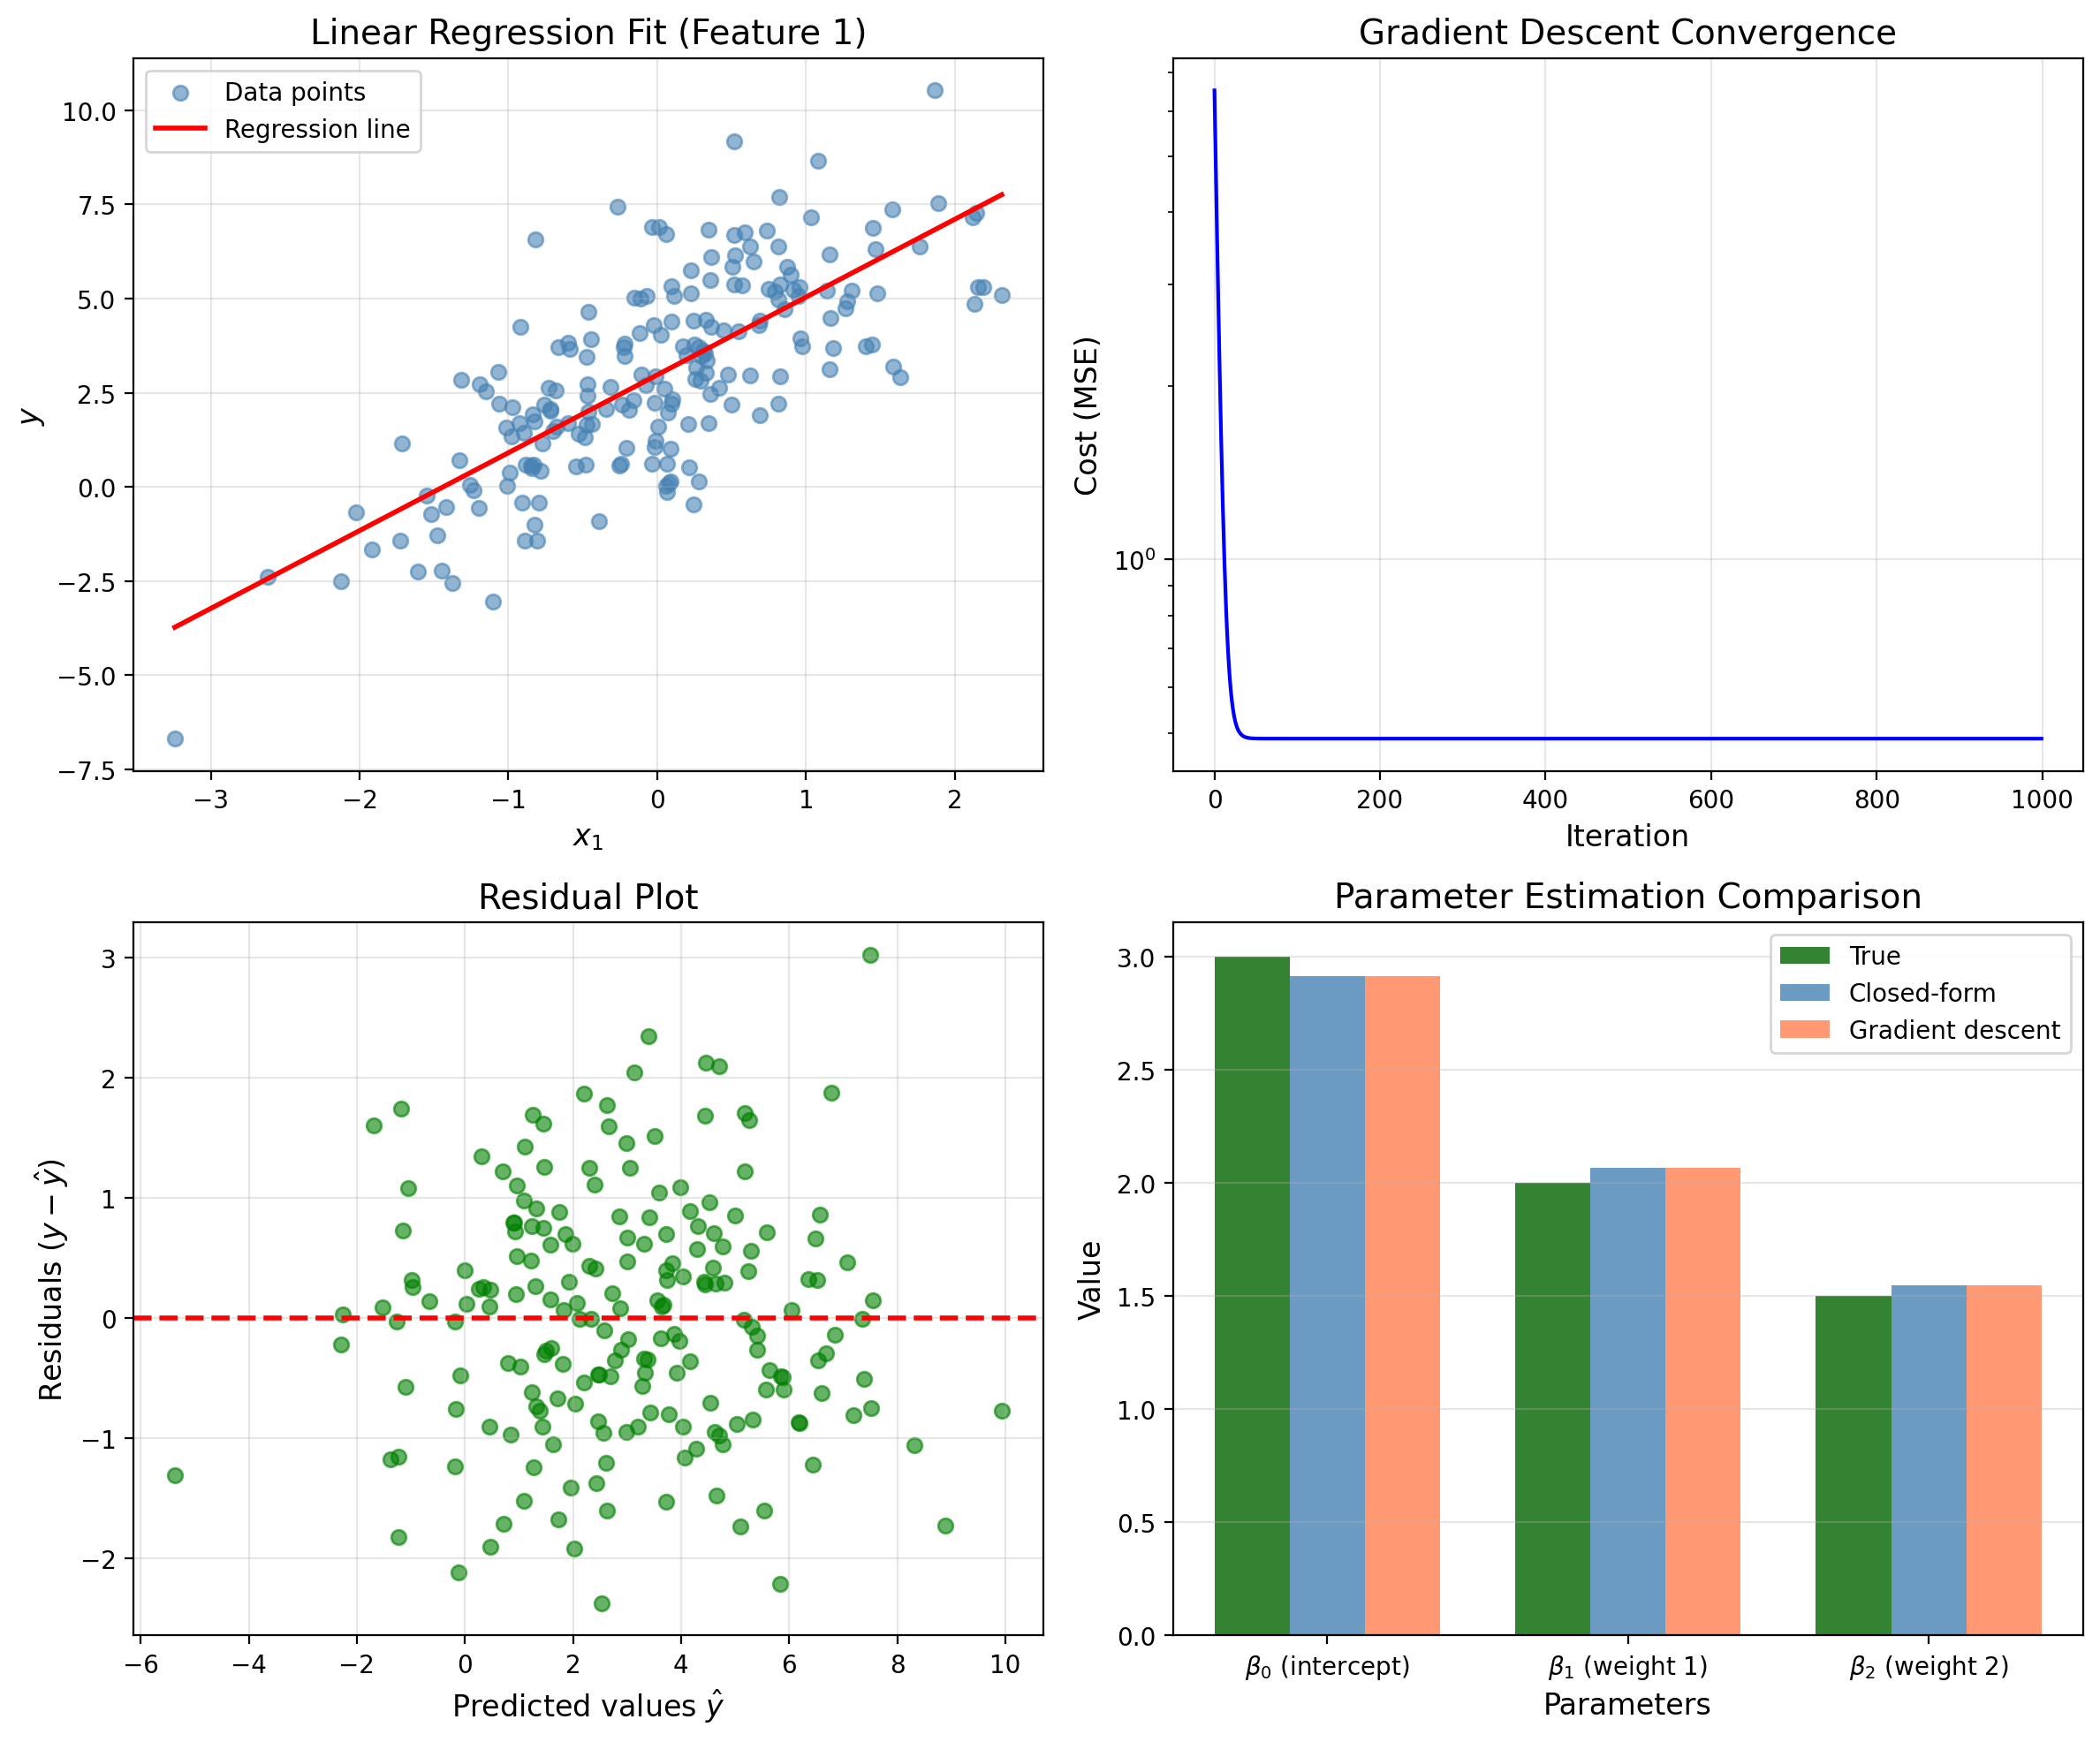


Plot saved to 'plot.png'


In [6]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Data and regression line (using first feature)
ax1 = axes[0, 0]
ax1.scatter(X[:, 0], y, alpha=0.6, label='Data points', color='steelblue')

# Create prediction line for first feature (holding second at mean)
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X_pred = np.column_stack([x_line, np.full_like(x_line, X[:, 1].mean())])
y_line = model_closed.predict(X_pred)
ax1.plot(x_line, y_line, 'r-', linewidth=2, label='Regression line')
ax1.set_xlabel('$x_1$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_title('Linear Regression Fit (Feature 1)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Gradient descent convergence
ax2 = axes[0, 1]
ax2.plot(model_gd.cost_history, 'b-', linewidth=1.5)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Cost (MSE)', fontsize=12)
ax2.set_title('Gradient Descent Convergence', fontsize=14)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Plot 3: Residual analysis
ax3 = axes[1, 0]
y_pred = model_closed.predict(X)
residuals = y - y_pred
ax3.scatter(y_pred, residuals, alpha=0.6, color='green')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicted values $\hat{y}$', fontsize=12)
ax3.set_ylabel('Residuals $(y - \hat{y})$', fontsize=12)
ax3.set_title('Residual Plot', fontsize=14)
ax3.grid(True, alpha=0.3)

# Plot 4: Parameter comparison
ax4 = axes[1, 1]
params = ['$\\beta_0$ (intercept)', '$\\beta_1$ (weight 1)', '$\\beta_2$ (weight 2)']
true_values = [true_intercept, true_weights[0], true_weights[1]]
closed_values = [model_closed.bias, model_closed.weights[0], model_closed.weights[1]]
gd_values = [model_gd.bias, model_gd.weights[0], model_gd.weights[1]]

x_pos = np.arange(len(params))
width = 0.25

bars1 = ax4.bar(x_pos - width, true_values, width, label='True', color='darkgreen', alpha=0.8)
bars2 = ax4.bar(x_pos, closed_values, width, label='Closed-form', color='steelblue', alpha=0.8)
bars3 = ax4.bar(x_pos + width, gd_values, width, label='Gradient descent', color='coral', alpha=0.8)

ax4.set_xlabel('Parameters', fontsize=12)
ax4.set_ylabel('Value', fontsize=12)
ax4.set_title('Parameter Estimation Comparison', fontsize=14)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(params)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# Save the plot
plt.savefig('linear_regression_from_scratch_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Model Evaluation Metrics

Let's compute additional metrics to evaluate our model performance.

In [7]:
def compute_metrics(y_true, y_pred):
    """
    Compute regression evaluation metrics.
    
    Returns:
    --------
    dict : Dictionary containing MSE, RMSE, MAE, and R²
    """
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Compute metrics for closed-form solution
y_pred_closed = model_closed.predict(X)
metrics_closed = compute_metrics(y, y_pred_closed)

# Compute metrics for gradient descent solution
y_pred_gd = model_gd.predict(X)
metrics_gd = compute_metrics(y, y_pred_gd)

print("=" * 50)
print("Model Evaluation Metrics")
print("=" * 50)
print(f"\n{'Metric':<10} {'Closed-Form':>15} {'Gradient Descent':>18}")
print("-" * 45)
for metric in ['MSE', 'RMSE', 'MAE', 'R²']:
    print(f"{metric:<10} {metrics_closed[metric]:>15.4f} {metrics_gd[metric]:>18.4f}")

Model Evaluation Metrics

Metric         Closed-Form   Gradient Descent
---------------------------------------------
MSE                 0.9773             0.9773
RMSE                0.9886             0.9886
MAE                 0.7973             0.7973
R²                  0.8589             0.8589


## Conclusion

In this notebook, we implemented linear regression from scratch using two methods:

1. **Closed-form solution (Normal Equation)**: Provides an exact analytical solution in one step
   - Advantages: Fast for small datasets, exact solution
   - Disadvantages: Computationally expensive for large datasets ($O(n^3)$ for matrix inversion)

2. **Gradient descent**: Iteratively optimizes the cost function
   - Advantages: Scales well to large datasets, memory efficient
   - Disadvantages: Requires tuning hyperparameters (learning rate, iterations)

Both methods successfully recovered the true parameters with high accuracy, demonstrating the effectiveness of linear regression for modeling linear relationships in data.

### Key Takeaways

- The R² score close to 1 indicates that the model explains most of the variance in the data
- The residual plot shows randomly scattered residuals around zero, indicating a good fit
- Both optimization methods converge to nearly identical solutions